# Crime Against Women From 2001 to 2014

### Importing Modules

In [1]:
!pip install jovian --upgrade --quiet pip

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import jovian
import matplotlib.pyplot as plt
%matplotlib inline

<IPython.core.display.Javascript object>

### Read Data 

In [3]:
crimes_df = pd.read_csv('C:/Users/varti/crimes_against_women.csv') #don't use forward slash

In [4]:
crimes_df

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...,...
10672,Lakshadweep,Lakshadweep,2014,1,0,0,1,2,0,0
10673,Lakshadweep,Total District(s),2014,1,0,0,1,2,0,0
10674,Puducherry,Karaikal,2014,3,1,0,12,1,1,0
10675,Puducherry,Puducherry,2014,7,6,1,20,7,3,0


### Data Preparation and Cleaning

In [5]:
overall_crime = crimes_df.isna().sum()

In [6]:
overall_crime

STATE/UT                                               0
DISTRICT                                               0
Year                                                   0
Rape                                                   0
Kidnapping and Abduction                               0
Dowry Deaths                                           0
Assault on women with intent to outrage her modesty    0
Insult to modesty of Women                             0
Cruelty by Husband or his Relatives                    0
Importation of Girls                                   0
dtype: int64

#### None of the column has any Null values.

#### Number of 'Unique' districts, where the crimes have been committed :

In [7]:
districts = len(crimes_df.DISTRICT.unique())

In [8]:
districts

1605

#### List of 'Unique' States  where the crimes have been committed :

#### This data is faulty as there are only 718 disctricts in India. Hence, we can drop this column

In [9]:
crimes_df.drop(['DISTRICT'], axis = 1, inplace=True)

In [10]:
crimes_df.rename( columns = {'Kidnapping and Abduction':'Kidnapping_Abduction','Dowry Deaths':'Dowry_Deaths',
                             'Assault on women with intent to outrage her modesty':'Hurting_of_womens_modesty',
                             'Insult to modesty of Women':'Insult_to_womens_modesty',
                             'Cruelty by Husband or his Relatives':'Domestic_Cruelty',
                             'Importation of Girls':'Importation_of_Girls'}, inplace = True)

In [11]:
crimes_df

,STATE/UT,Year,Rape,Kidnapping_Abduction,Dowry_Deaths,Hurting_of_womens_modesty,Insult_to_womens_modesty,Domestic_Cruelty,Importation_of_Girls
0,ANDHRA PRADESH,2001,50,30,16,149,34,175,0
1,ANDHRA PRADESH,2001,23,30,7,118,24,154,0
2,ANDHRA PRADESH,2001,27,34,14,112,83,186,0
3,ANDHRA PRADESH,2001,20,20,17,126,38,57,0
4,ANDHRA PRADESH,2001,23,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...
10672,Lakshadweep,2014,1,0,0,1,2,0,0
10673,Lakshadweep,2014,1,0,0,1,2,0,0
10674,Puducherry,2014,3,1,0,12,1,1,0
10675,Puducherry,2014,7,6,1,20,7,3,0


In [12]:
print(crimes_df['STATE/UT'].unique())

['ANDHRA PRADESH' 'ARUNACHAL PRADESH' 'ASSAM' 'BIHAR' 'CHHATTISGARH' 'GOA'
 'GUJARAT' 'HARYANA' 'HIMACHAL PRADESH' 'JAMMU & KASHMIR' 'JHARKHAND'
 'KARNATAKA' 'KERALA' 'MADHYA PRADESH' 'MAHARASHTRA' 'MANIPUR' 'MEGHALAYA'
 'MIZORAM' 'NAGALAND' 'ODISHA' 'PUNJAB' 'RAJASTHAN' 'SIKKIM' 'TAMIL NADU'
 'TRIPURA' 'UTTAR PRADESH' 'UTTARAKHAND' 'WEST BENGAL' 'A & N ISLANDS'
 'CHANDIGARH' 'D & N HAVELI' 'DAMAN & DIU' 'DELHI' 'LAKSHADWEEP'
 'PUDUCHERRY' 'Andhra Pradesh' 'Arunachal Pradesh' 'Assam' 'Bihar'
 'Chhattisgarh' 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh'
 'Jammu & Kashmir' 'Jharkhand' 'Karnataka' 'Kerala' 'Madhya Pradesh'
 'Maharashtra' 'Manipur' 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha'
 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Tripura' 'Uttar Pradesh'
 'Uttarakhand' 'West Bengal' 'A&N Islands' 'Chandigarh' 'D&N Haveli'
 'Daman & Diu' 'Delhi UT' 'Lakshadweep' 'Puducherry' 'Telangana'
 'A & N Islands']


#### We can see from above that there are lot many repeated datas, like some of them are repeated again by using capital letters and some of them have issues with space too, like A&N Islands and also Delhi has been repeated again by mentioning it as Delhi UT

In [13]:
# Fist we will remove all the repeated uppercase values
def remove_uppercase(r):
    r = r['STATE/UT'].strip()
    r = r.upper()
    return r
crimes_df['STATE/UT'] = crimes_df.apply(remove_uppercase, axis=1)

#Now use replace function to replace the other type of repeated datas as dicussed above
crimes_df['STATE/UT'].replace("A&N ISLANDS", "A & N ISLANDS", inplace = True)
crimes_df['STATE/UT'].replace("D&N HAVELI", "D & N HAVELI", inplace = True)
crimes_df['STATE/UT'].replace("DELHI UT", "DELHI", inplace = True)

#### Final list of states 

In [14]:
crimes_df['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY', 'TELANGANA'],
      dtype=object)

In [15]:
len(crimes_df['STATE/UT'].unique())

36

#### hence we are done processing our data

### Data Visualization 

#### Total population of women over the years, 2001-2014 who have been a victim of the crime based on their gender.

In [16]:
victims_raped = crimes_df.Rape.sum()
victims_kidnapped_abducted = crimes_df.Kidnapping_Abduction.sum()
dowery_death = crimes_df.Dowry_Deaths.sum()
modesty_assault = crimes_df.Hurting_of_womens_modesty.sum()
insult_to_modesty = crimes_df.Insult_to_womens_modesty.sum()
domestic_violence = crimes_df.Domestic_Cruelty.sum()
girls_imported = crimes_df.Importation_of_Girls.sum()

In [17]:
total_population_of_victim_overall = victims_raped + victims_raped + dowery_death +modesty_assault+ insult_to_modesty + domestic_violence+ girls_imported
total_population_of_victim_overall

5194570

#### This above analysis potrays a heartbreaking situation of women in our society, as more than 5 million number of females, over the years 2001-2014, have been a victim of assault, violance, rape or even death, in India alone.

#### Note - This sum is obtained under the assumption that the data of a single woman is not present in two different categories of crime against women

### Analysing cases using bar graph

In [18]:
import jovian

Text(0, 0.5, 'Cases ofImportation of girls in India')

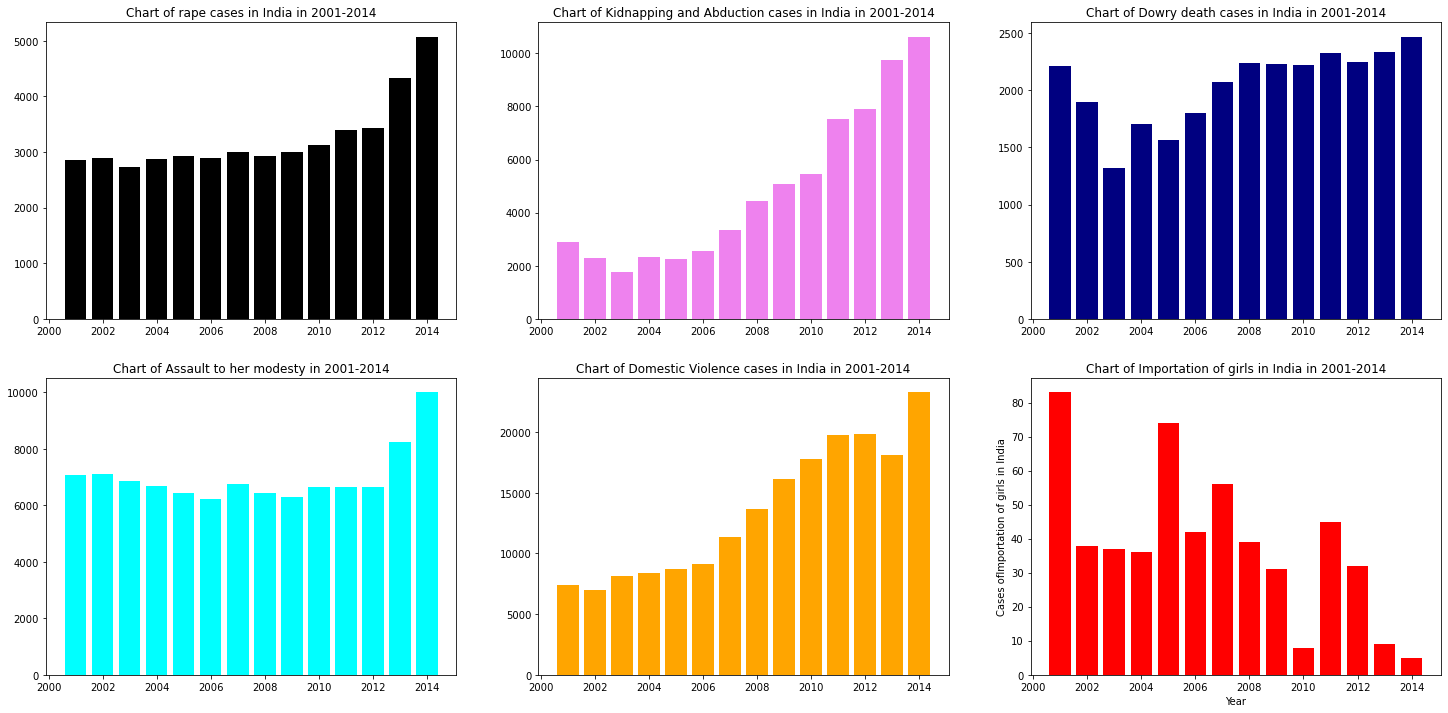

In [19]:
fig, axes = plt.subplots(2, 3, figsize=(25, 12))

axes[0,0].set_title("Chart of rape cases in India in 2001-2014")
axes[0,0].bar(crimes_df.Year, crimes_df.Rape, color = 'black');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of Rape in India') #Y-axis

axes[0,1].set_title("Chart of Kidnapping and Abduction cases in India in 2001-2014")
axes[0,1].bar(crimes_df.Year, crimes_df.Kidnapping_Abduction, color = 'violet');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of Kidnapping and Abduction in India') #Y-axis

axes[0,2].set_title("Chart of Dowry death cases in India in 2001-2014")
axes[0,2].bar(crimes_df.Year, crimes_df.Dowry_Deaths, color = 'navy');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of Dowry deaths in India') #Y-axis

axes[1,0].set_title("Chart of Assault to her modesty in 2001-2014")
axes[1,0].bar(crimes_df.Year, crimes_df.Hurting_of_womens_modesty, color = 'cyan');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of Assaulting a women for her modesty in India') #Y-axis

axes[1,1].set_title("Chart of Domestic Violence cases in India in 2001-2014")
axes[1,1].bar(crimes_df.Year, crimes_df.Domestic_Cruelty, color = 'orange');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of Domestic Violence in India') #Y-axis

axes[1,2].set_title("Chart of Importation of girls in India in 2001-2014")
axes[1,2].bar(crimes_df.Year, crimes_df.Importation_of_Girls, color = 'red');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases ofImportation of girls in India') #Y-axis

#### There are two things to be concluded from the above bar chart -
#### 1) The cases have incraesed over the years.
#### 2) 2014 has been the year, where violance against women was reported the maximum, under each of the cases like, rape, domestic violence etc, which can also be proved below, which can also be cross examined with the code below.

### Crimes Against women grouped by Year: 

In [22]:
count_df = crimes_df.groupby('Year')[['STATE/UT']].count()
count_df

,STATE/UT
Year,
2001,716
2002,719
2003,728
2004,729
2005,733
2006,740
2007,743
2008,761
2009,767


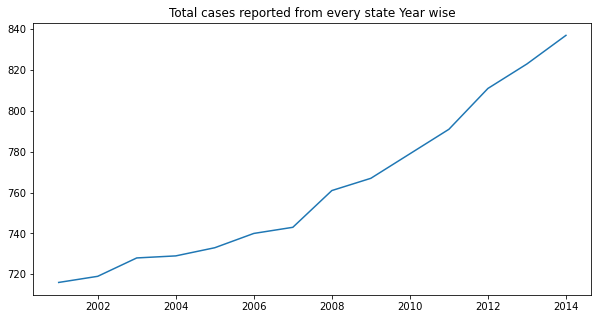

In [25]:
plt.figure(figsize=(10,5))
plt.title("Total cases reported from every state Year wise")
plt.plot(count_df);

### Analysing data on different crimes against women

#### Number of cases of crimes against women in different states

In [71]:
counts_df = crimes_df.groupby('STATE/UT')[['Rape', 'Kidnapping_Abduction', 'Dowry_Deaths','Domestic_Cruelty', 'Importation_of_Girls']].sum()
counts_df

,Rape,Kidnapping_Abduction,Dowry_Deaths,Domestic_Cruelty,Importation_of_Girls
STATE/UT,,,,,
A & N ISLANDS,336,212,20,288,0
ANDHRA PRADESH,32150,34504,13844,280906,34
ARUNACHAL PRADESH,1316,1470,6,476,0
ASSAM,40190,62074,3268,115300,22
BIHAR,30758,57086,32206,69770,904
CHANDIGARH,770,1682,90,2080,0
CHHATTISGARH,29308,11808,2758,23436,12
D & N HAVELI,132,224,2,90,0
DAMAN & DIU,60,44,6,76,0


In [72]:
grp = counts_df.groupby('STATE/UT')
x = grp['Rape'].agg(np.sum)
y = grp['Kidnapping_Abduction'].agg(np.sum)
z = grp['Dowry_Deaths'].agg(np.sum)
w = grp['Domestic_Cruelty'].agg(np.sum)
u = grp['Importation_of_Girls'].agg(np.sum)

#### Number of cases of rape cases against women in different states

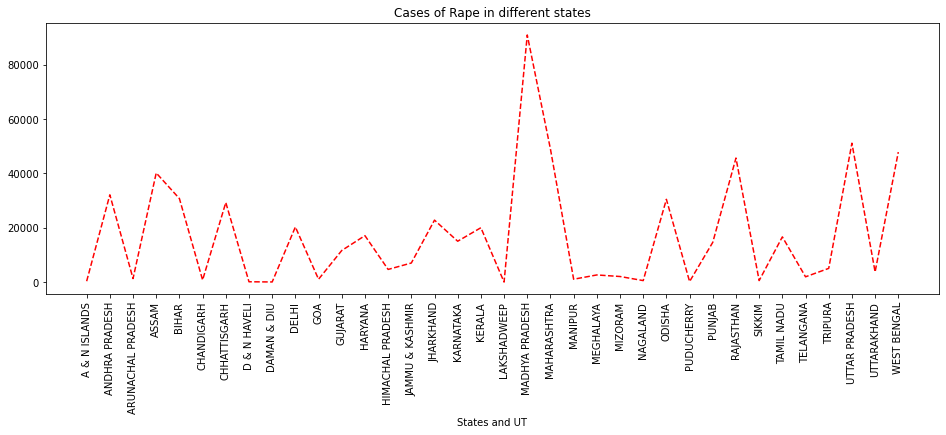

In [73]:
plt.figure(figsize=(16,5))
plt.plot(x,'r--', color='r')
plt.xticks(rotation=90)
plt.title('Cases of Rape in different states')
plt.xlabel('States and UT')
plt.show()

#### Number of cases of kidnapping against women in different states

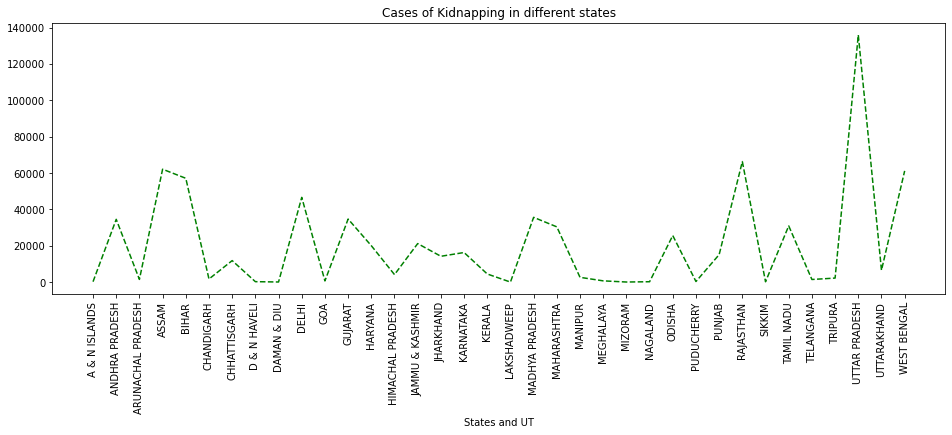

In [70]:
plt.figure(figsize=(16,5))
plt.plot(y,'r--', color='g')
plt.xticks(rotation=90)
plt.title('Cases of Kidnapping in different states')
plt.xlabel('States and UT')
plt.show()

#### Number of cases of dowry deaths against women in different states

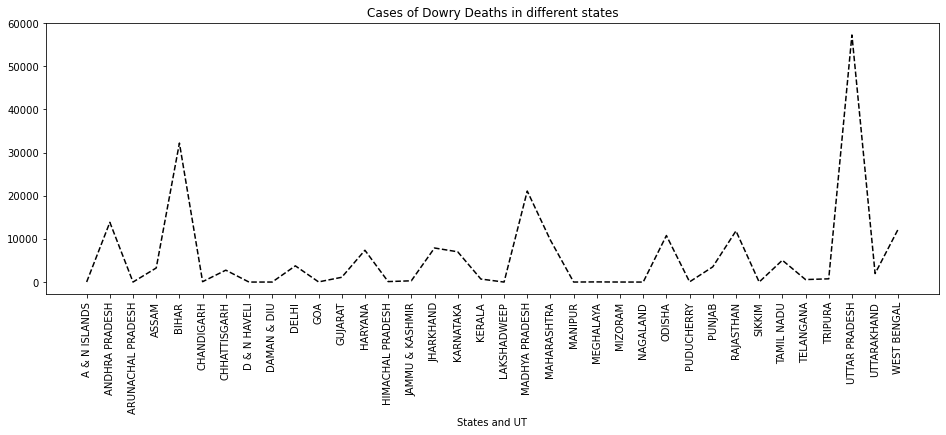

In [81]:
plt.figure(figsize=(16,5))
plt.plot(z,'r--', color='k')
plt.xticks(rotation=90)
plt.title('Cases of Dowry Deaths in different states')
plt.xlabel('States and UT')
plt.show()

#### Number of cases of domestic cruelty against women in different states

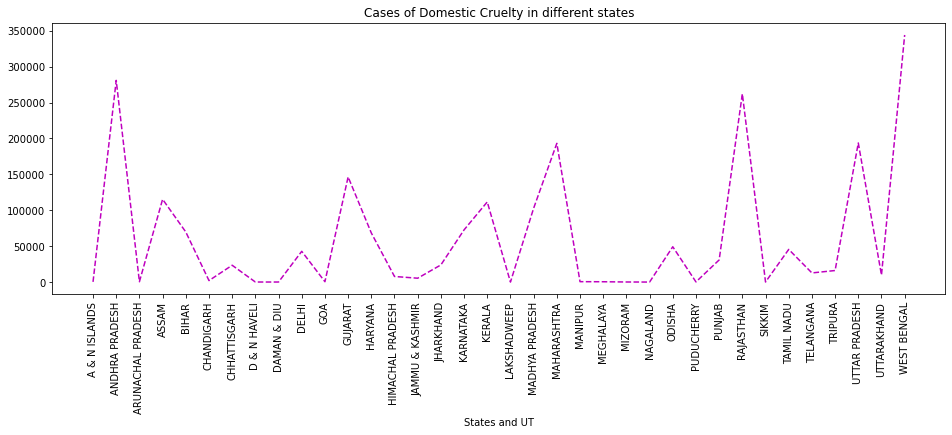

In [80]:
plt.figure(figsize=(16,5))
plt.plot(w,'r--', color='m')
plt.xticks(rotation=90)
plt.title('Cases of Domestic Cruelty in different states')
plt.xlabel('States and UT')
plt.show()

#### Number of cases of importation of girls in different states

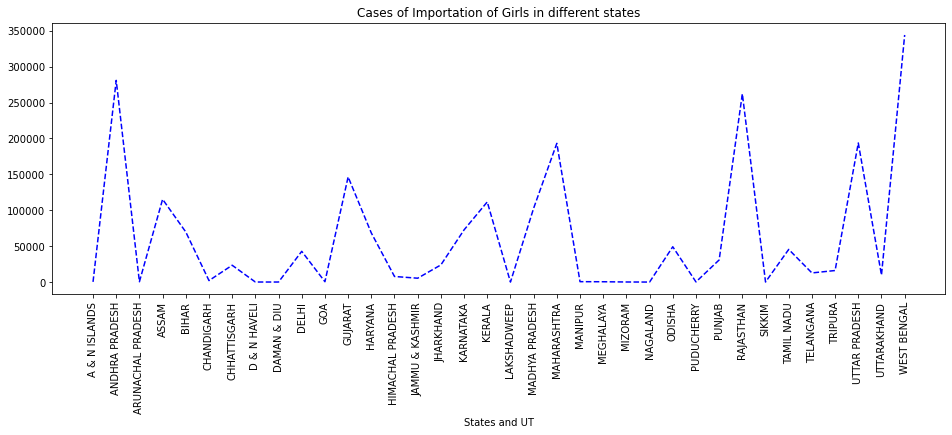

In [74]:
plt.figure(figsize=(16,5))
plt.plot(w,'r--', color='b')
plt.xticks(rotation=90)
plt.title('Cases of Importation of Girls in different states')
plt.xlabel('States and UT')
plt.show()